In [1]:
!pip install transformers datasets torch torchvision pillow

     ---------------------------------------- 0.0/130.7 kB ? eta -:--:--
     --- ------------------------------------ 10.2/130.7 kB ? eta -:--:--
     -------------------- ---------------- 71.7/130.7 kB 787.7 kB/s eta 0:00:01
     -------------------------------------- 130.7/130.7 kB 1.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.5 MB ? eta -:--:--
   --- ------------------------------------ 0.8/8.5 MB 17.6 MB/s eta 0:00:01
   -------------- ------------------------- 3.2/8.5 MB 33.8 MB/s eta 0:00:01
   ------------------------ --------------- 5.3/8.5 MB 38.0 MB/s eta 0:00:01
   ------------------------------------ --- 7.8/8.5 MB 41.9 MB/s eta 0:00:01
   ---------------------------------------- 8.5/8.5 MB 39.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/510.5 kB ? eta -:--:--
   --------------------------------------- 510.5/510.5 kB 33.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/116.3 kB ? eta -:--:--
   --------------

In [3]:
!pip install matplotlib

     ---------------------------------------- 0.0/162.3 kB ? eta -:--:--
     -------------------------- ----------- 112.6/162.3 kB 3.3 MB/s eta 0:00:01
     -------------------------------------- 162.3/162.3 kB 3.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.6 MB ? eta -:--:--
   ------ --------------------------------- 1.2/7.6 MB 38.4 MB/s eta 0:00:01
   ---------------- ----------------------- 3.1/7.6 MB 40.2 MB/s eta 0:00:01
   ------------------ --------------------- 3.5/7.6 MB 36.8 MB/s eta 0:00:01
   --------------------------- ------------ 5.2/7.6 MB 30.2 MB/s eta 0:00:01
   ---------------------------------------  7.5/7.6 MB 34.1 MB/s eta 0:00:01
   ---------------------------------------- 7.6/7.6 MB 30.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/181.9 kB ? eta -:--:--
   --------------------------------------- 181.9/181.9 kB 10.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   -------------

In [17]:
import torch
from torchvision.datasets import MNIST
from torchvision import transforms
from transformers import ViTForImageClassification

# Check if GPU is available and set the device accordingly
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Load the pre-trained model and move it to the selected device (GPU if available)
model = ViTForImageClassification.from_pretrained('farleyknight-org-username/vit-base-mnist').to(device)

# Download and load the MNIST dataset with necessary transformations
mnist_transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

mnist_dataset = MNIST(root='./data', train=False, transform=mnist_transform, download=True)

# Set model to evaluation mode
model.eval()

# Initialize a list to store missed predictions
missed_predictions = []

# Iterate over the entire dataset
for i in range(len(mnist_dataset)):
    image, actual_label = mnist_dataset[i]
    inputs = image.unsqueeze(0).to(device)  # Move input to the same device as the model

    # Inference
    outputs = model(inputs)
    logits = outputs.logits
    predicted_label = logits.argmax(-1).item()

    # Check if the prediction is incorrect
    if predicted_label != actual_label:
        print(i)
        # Store the missed prediction information
        missed_predictions.append((i, image, actual_label, predicted_label))

Using device: cuda
119
157
175
221
269
318
333
339
359
412
444
445
447
490
498
582
583
597
613
625
629
642
646
659
674
741
797
846
883
947
1124
1191
1224
1232
1260
1403
1462
1517
1621
1670
1790
1809
1811
1878
1895
1901
1940
2035
2040
2098
2129
2130
2327
2447
2454
2525
2559
2597
2654
2780
2811
2956
3166
3250
3251
3330
3361
3384
3414
3422
3511
3558
3682
3724
3762
3776
3876
3913
3946
3968
4027
4048
4065
4072
4176
4284
4289
4360
4433
4443
4477
4482
4504
4513
4547
4617
4723
4823
4834
4878
4923
4943
4997
5035
5152
5160
5187
5194
5207
5251
5288
5593
5626
5634
5636
5749
5937
5997
6011
6081
6166
6391
6392
6576
6598
6607
6614
6625
6651
6672
6783
6785
7190
7216
7354
7597
7627
7747
7749
7819
7826
7830
8273
8278
8316
8323
8326
8382
8490
8527
8849
8868
8983
9016
9038
9158
9244
9505
9595
9664
9669
9679
9700
9729
9800
9811
9850
9870
9879
9883
9904


Index: 119, Actual label: 2, Predicted label: 3


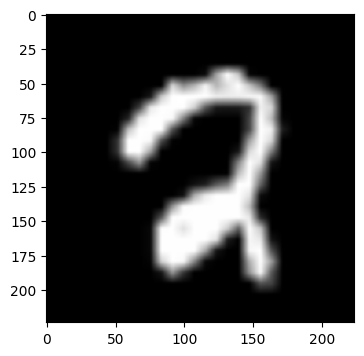

Index: 157, Actual label: 0, Predicted label: 9


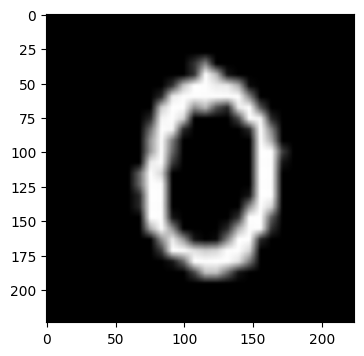

Index: 175, Actual label: 7, Predicted label: 1


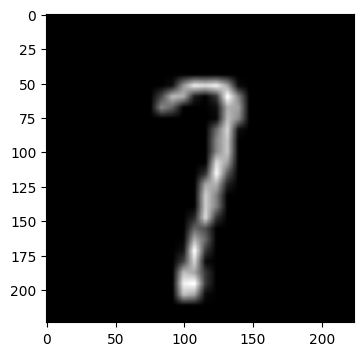

Index: 221, Actual label: 2, Predicted label: 6


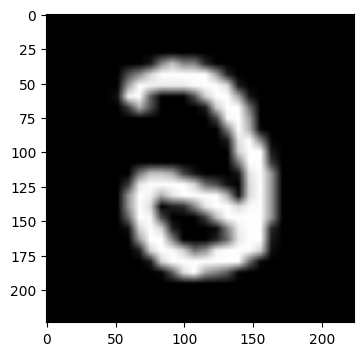

Index: 269, Actual label: 0, Predicted label: 9


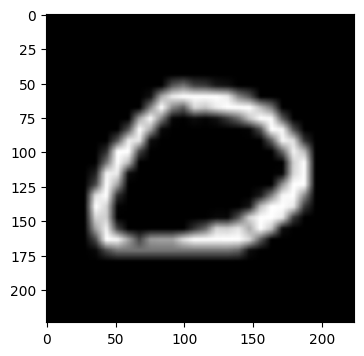

Index: 318, Actual label: 2, Predicted label: 6


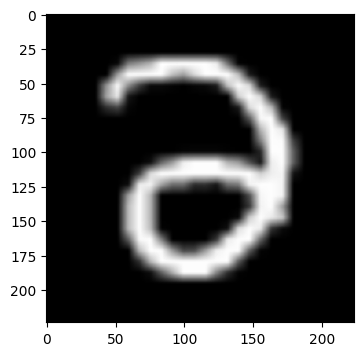

Index: 333, Actual label: 5, Predicted label: 2


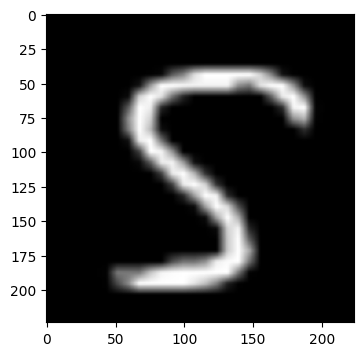

Index: 339, Actual label: 6, Predicted label: 2


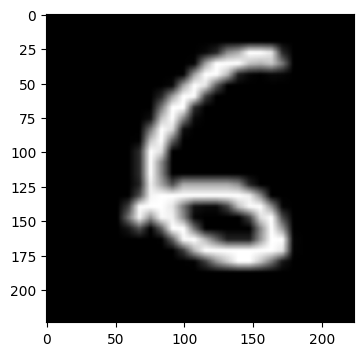

Index: 359, Actual label: 9, Predicted label: 4


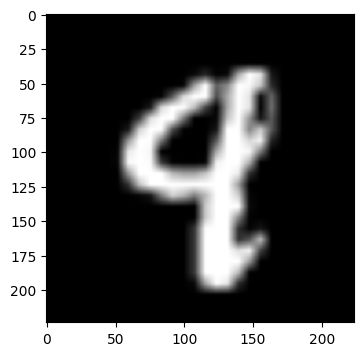

Index: 412, Actual label: 5, Predicted label: 3


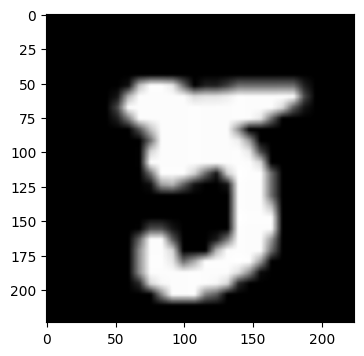

Index: 444, Actual label: 2, Predicted label: 3


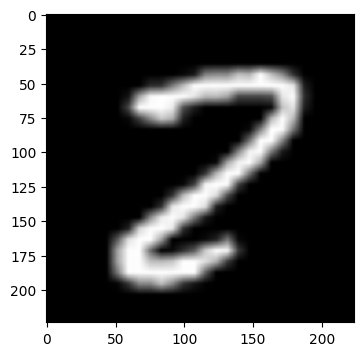

Index: 445, Actual label: 6, Predicted label: 0


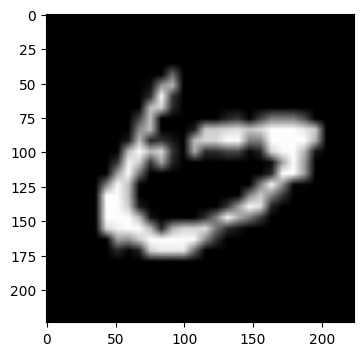

Index: 447, Actual label: 4, Predicted label: 9


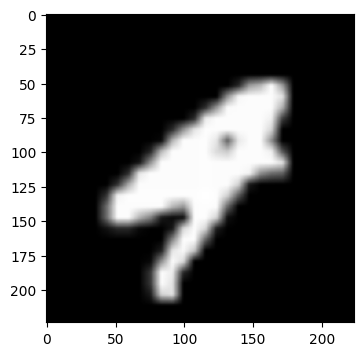

Index: 490, Actual label: 0, Predicted label: 4


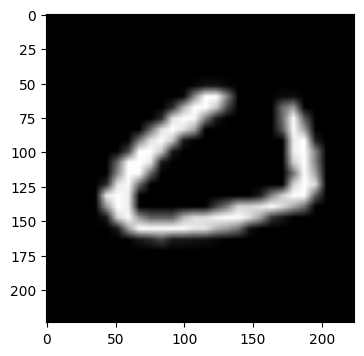

Index: 498, Actual label: 0, Predicted label: 9


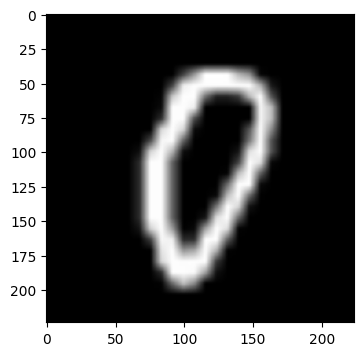

Index: 582, Actual label: 8, Predicted label: 3


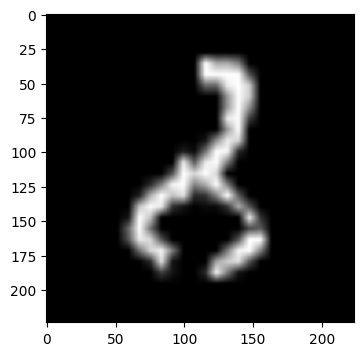

Index: 583, Actual label: 2, Predicted label: 7


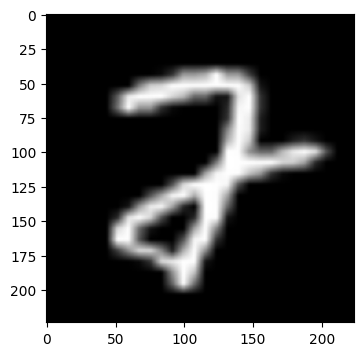

Index: 597, Actual label: 0, Predicted label: 9


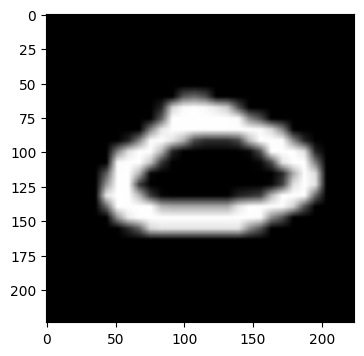

Index: 613, Actual label: 2, Predicted label: 3


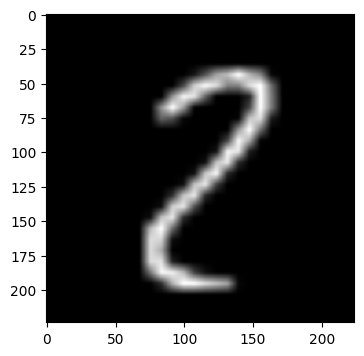

Index: 625, Actual label: 6, Predicted label: 4


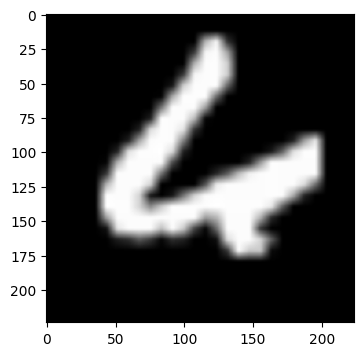

Index: 629, Actual label: 2, Predicted label: 6


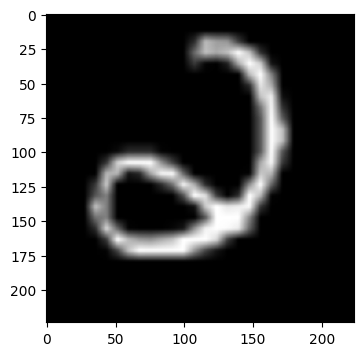

Index: 642, Actual label: 0, Predicted label: 9


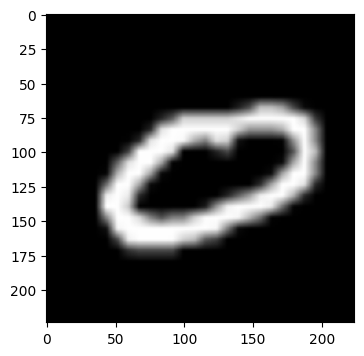

Index: 646, Actual label: 2, Predicted label: 4


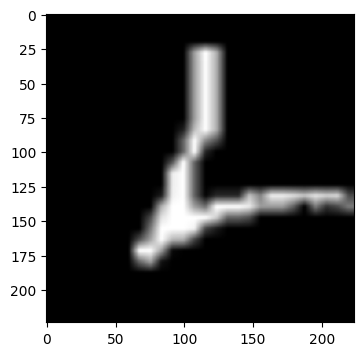

Index: 659, Actual label: 2, Predicted label: 1


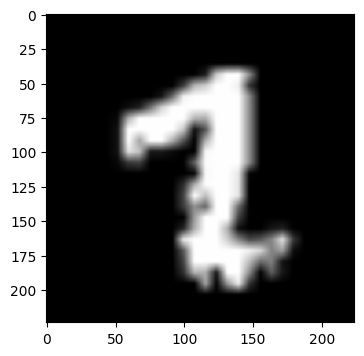

Index: 674, Actual label: 5, Predicted label: 3


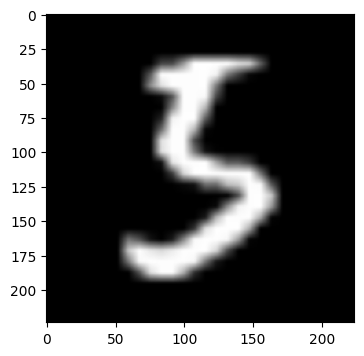

Index: 741, Actual label: 2, Predicted label: 5


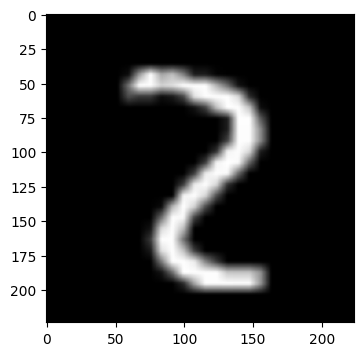

Index: 797, Actual label: 5, Predicted label: 7


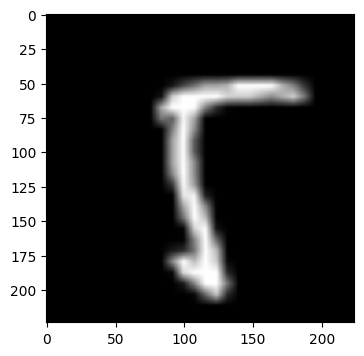

Index: 846, Actual label: 7, Predicted label: 2


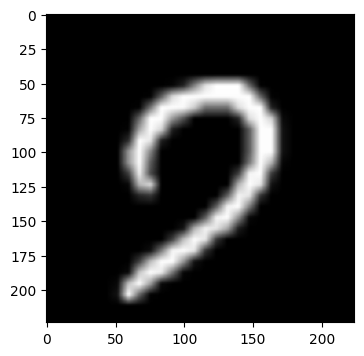

Index: 883, Actual label: 3, Predicted label: 5


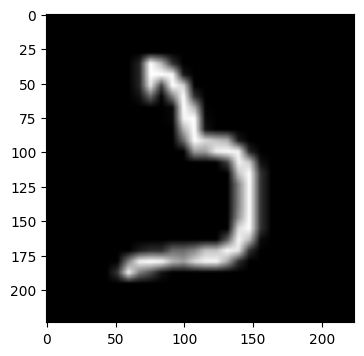

Index: 947, Actual label: 8, Predicted label: 9


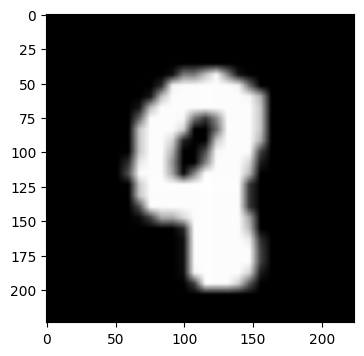

Index: 1124, Actual label: 8, Predicted label: 3


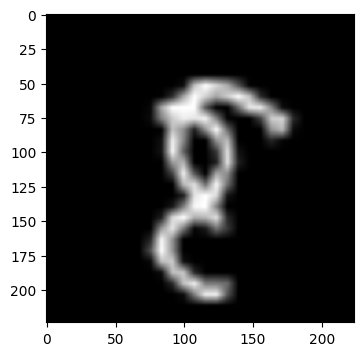

Index: 1191, Actual label: 0, Predicted label: 6


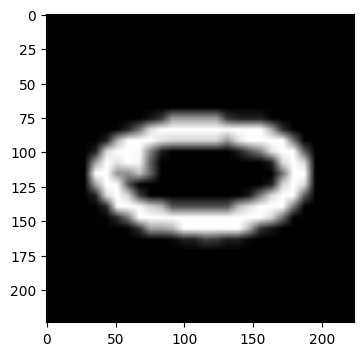

Index: 1224, Actual label: 2, Predicted label: 4


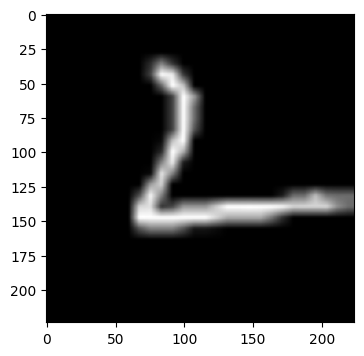

Index: 1232, Actual label: 9, Predicted label: 4


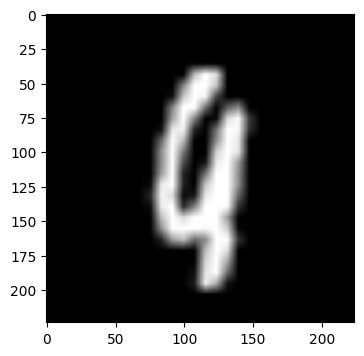

Index: 1260, Actual label: 7, Predicted label: 1


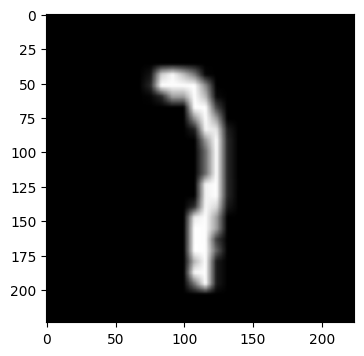

Index: 1403, Actual label: 1, Predicted label: 6


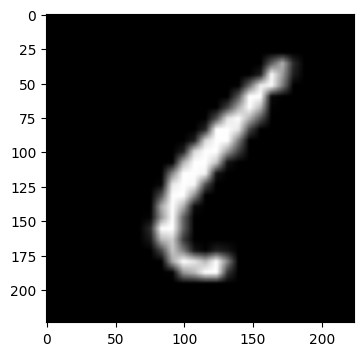

Index: 1462, Actual label: 2, Predicted label: 6


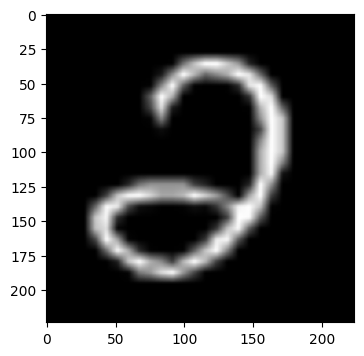

Index: 1517, Actual label: 0, Predicted label: 9


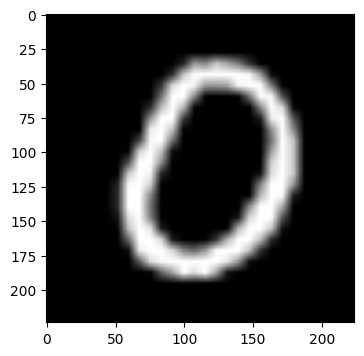

Index: 1621, Actual label: 0, Predicted label: 6


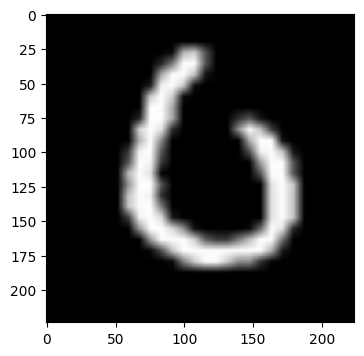

Index: 1670, Actual label: 5, Predicted label: 2


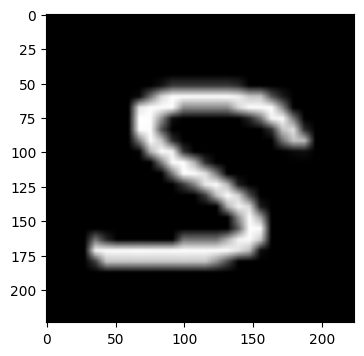

Index: 1790, Actual label: 2, Predicted label: 3


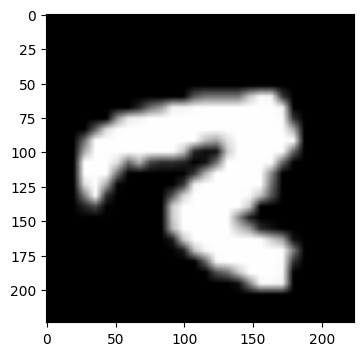

Index: 1809, Actual label: 7, Predicted label: 1


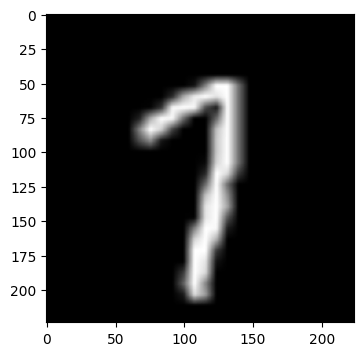

Index: 1811, Actual label: 2, Predicted label: 6


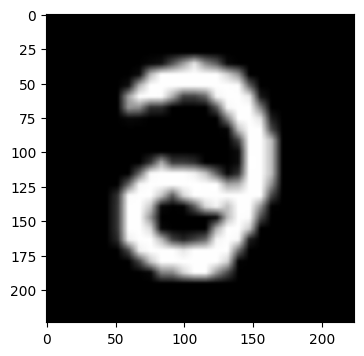

Index: 1878, Actual label: 8, Predicted label: 3


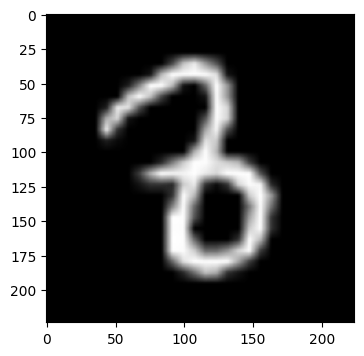

Index: 1895, Actual label: 2, Predicted label: 6


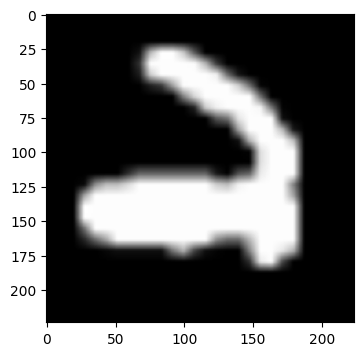

Index: 1901, Actual label: 9, Predicted label: 4


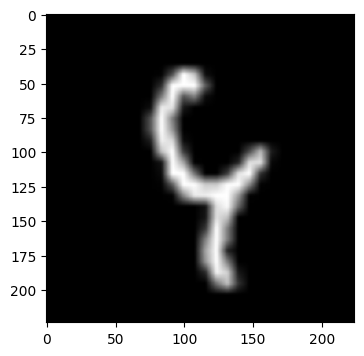

Index: 1940, Actual label: 5, Predicted label: 7


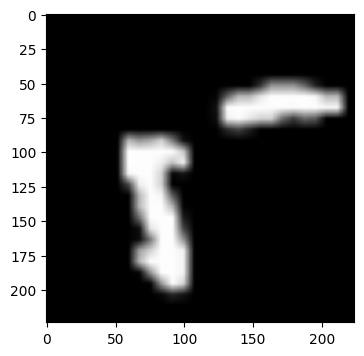

Index: 2035, Actual label: 5, Predicted label: 3


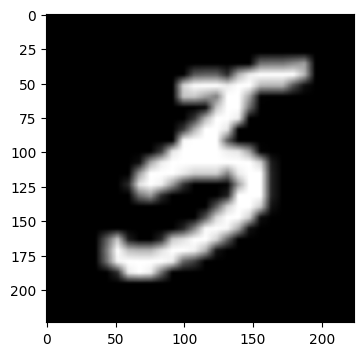

Index: 2040, Actual label: 5, Predicted label: 2


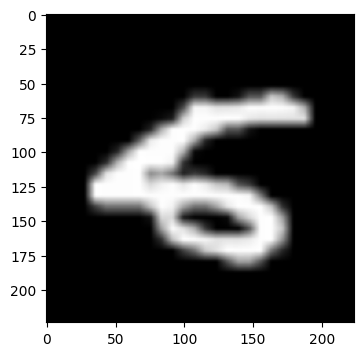

Index: 2098, Actual label: 2, Predicted label: 3


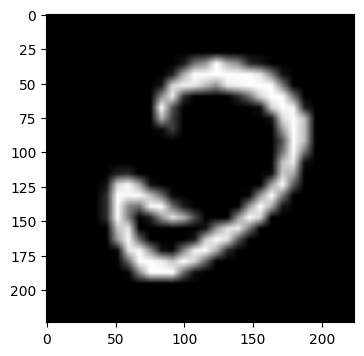

Index: 2129, Actual label: 9, Predicted label: 2


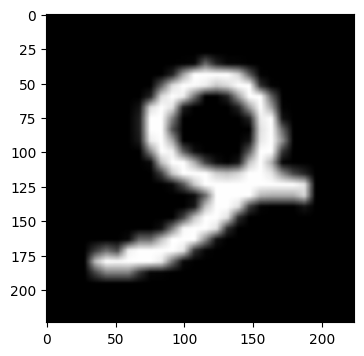

Index: 2130, Actual label: 4, Predicted label: 9


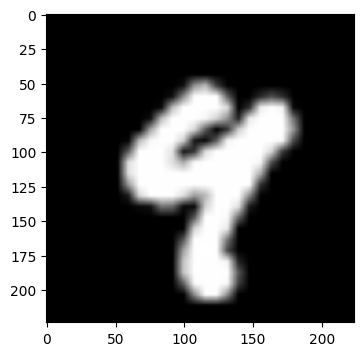

Index: 2327, Actual label: 2, Predicted label: 3


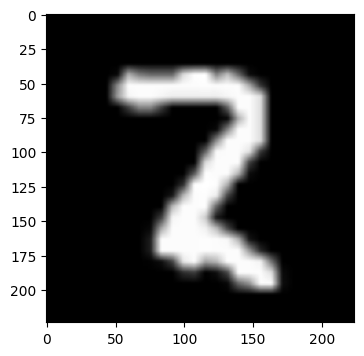

Index: 2447, Actual label: 4, Predicted label: 9


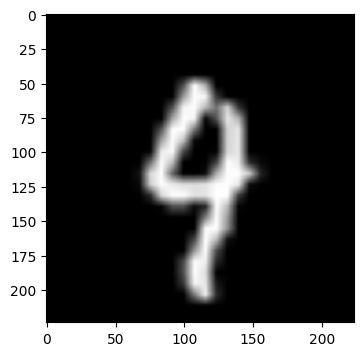

Index: 2454, Actual label: 6, Predicted label: 0


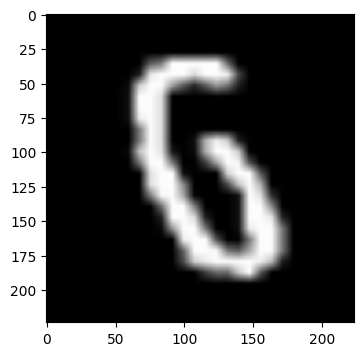

Index: 2525, Actual label: 5, Predicted label: 3


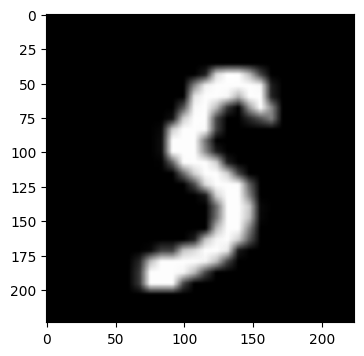

Index: 2559, Actual label: 5, Predicted label: 2


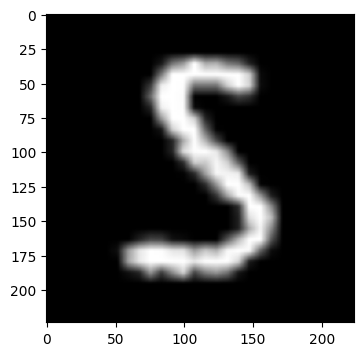

Index: 2597, Actual label: 5, Predicted label: 3


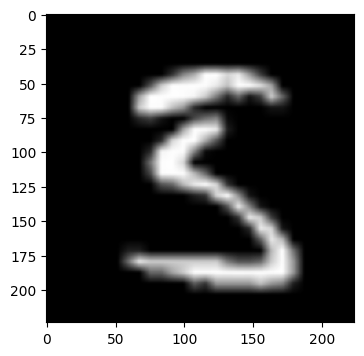

Index: 2654, Actual label: 6, Predicted label: 5


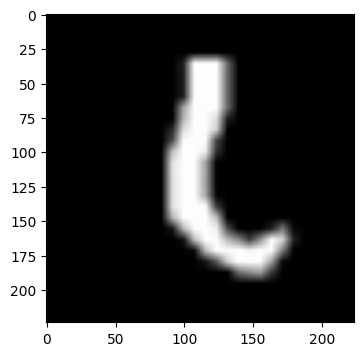

Index: 2780, Actual label: 2, Predicted label: 6


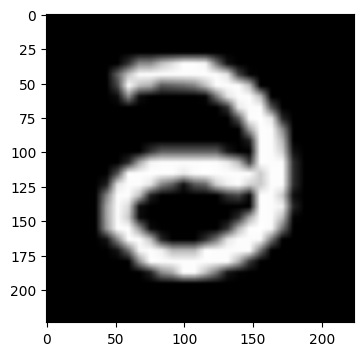

Index: 2811, Actual label: 0, Predicted label: 9


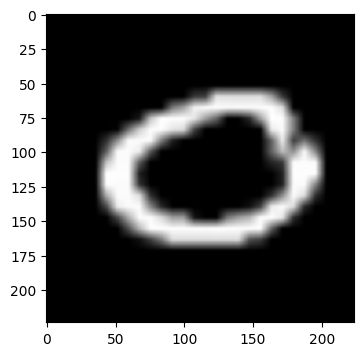

Index: 2956, Actual label: 5, Predicted label: 3


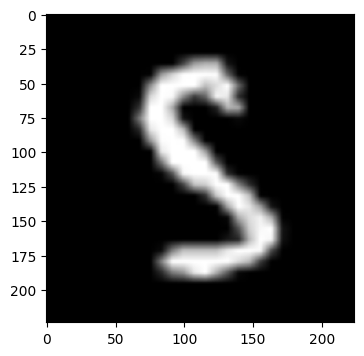

Index: 3166, Actual label: 7, Predicted label: 3


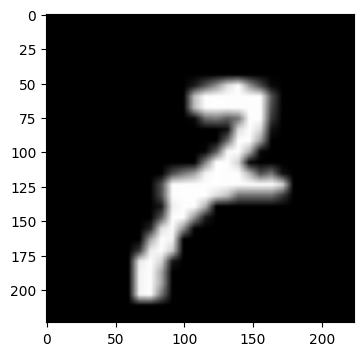

Index: 3250, Actual label: 2, Predicted label: 4


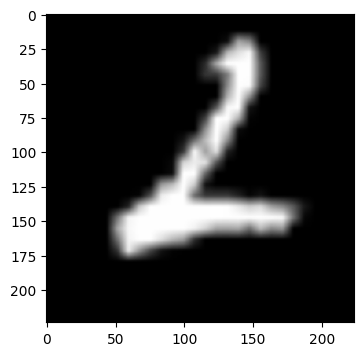

Index: 3251, Actual label: 0, Predicted label: 9


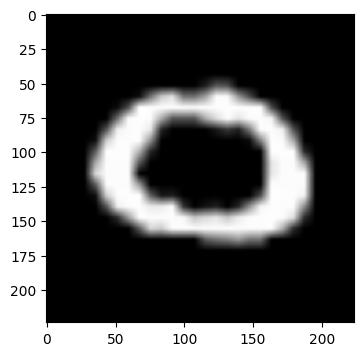

Index: 3330, Actual label: 2, Predicted label: 6


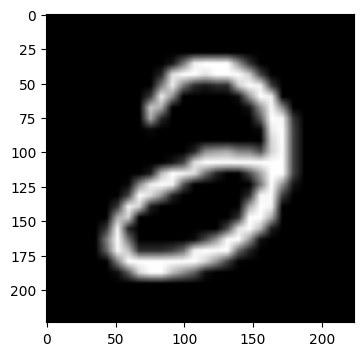

Index: 3361, Actual label: 7, Predicted label: 3


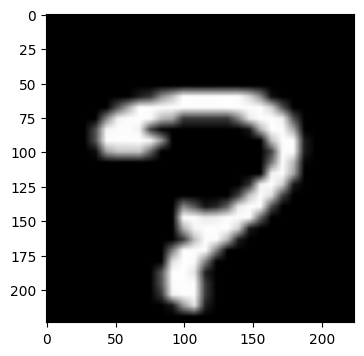

Index: 3384, Actual label: 2, Predicted label: 5


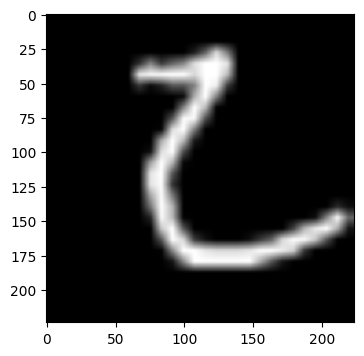

Index: 3414, Actual label: 5, Predicted label: 3


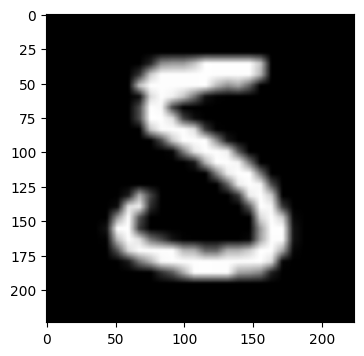

Index: 3422, Actual label: 6, Predicted label: 0


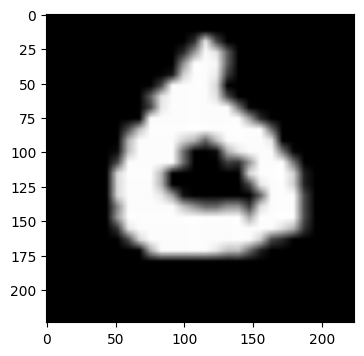

Index: 3511, Actual label: 2, Predicted label: 3


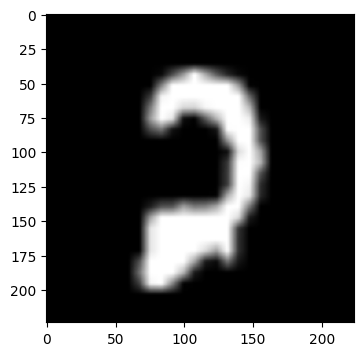

Index: 3558, Actual label: 5, Predicted label: 0


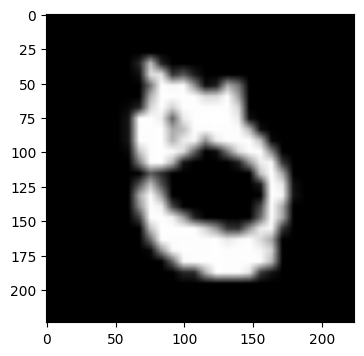

Index: 3682, Actual label: 2, Predicted label: 6


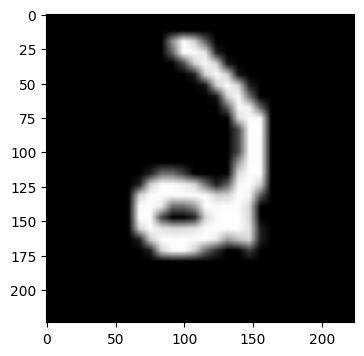

Index: 3724, Actual label: 0, Predicted label: 9


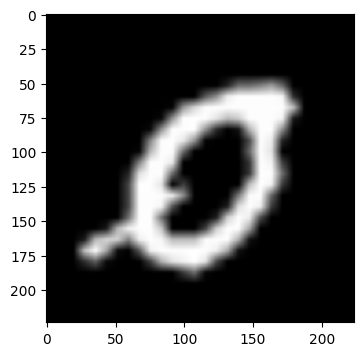

Index: 3762, Actual label: 6, Predicted label: 8


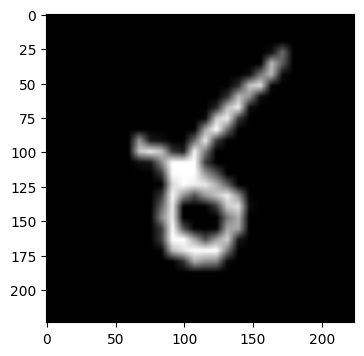

Index: 3776, Actual label: 5, Predicted label: 3


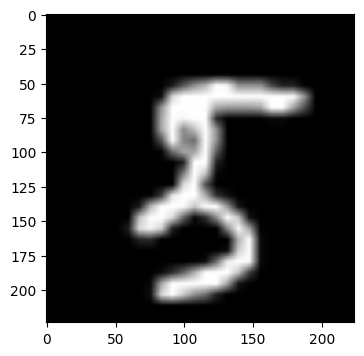

Index: 3876, Actual label: 2, Predicted label: 3


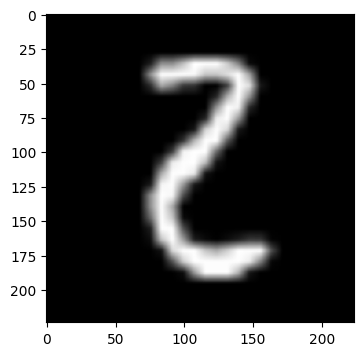

Index: 3913, Actual label: 2, Predicted label: 6


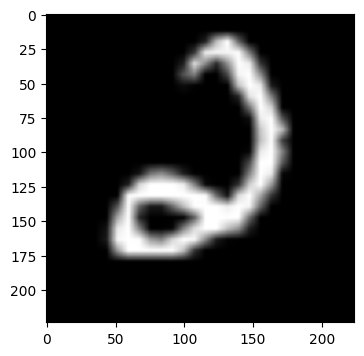

Index: 3946, Actual label: 2, Predicted label: 3


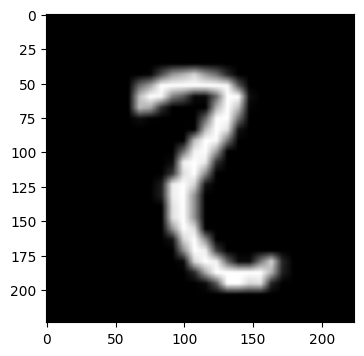

Index: 3968, Actual label: 5, Predicted label: 2


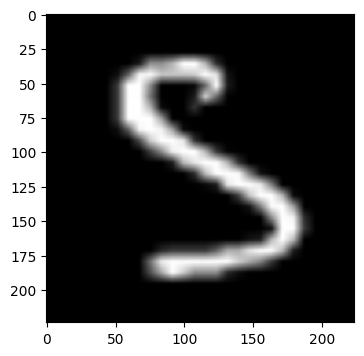

Index: 4027, Actual label: 7, Predicted label: 1


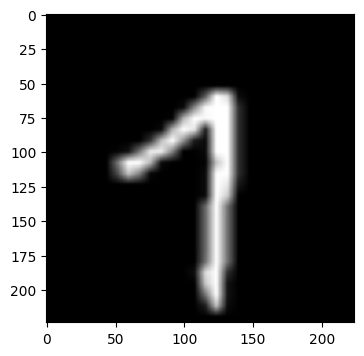

Index: 4048, Actual label: 0, Predicted label: 9


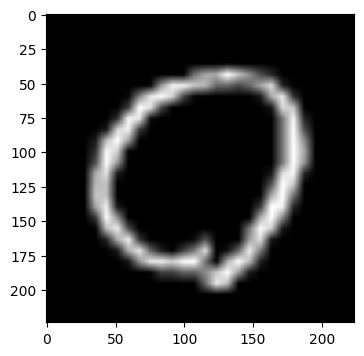

Index: 4065, Actual label: 0, Predicted label: 9


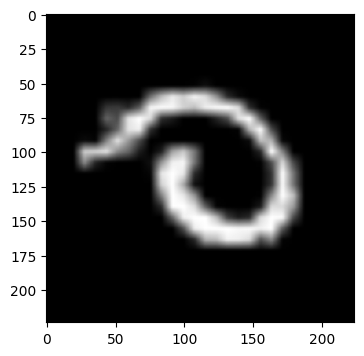

Index: 4072, Actual label: 5, Predicted label: 3


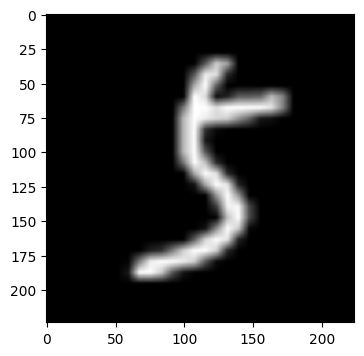

Index: 4176, Actual label: 2, Predicted label: 7


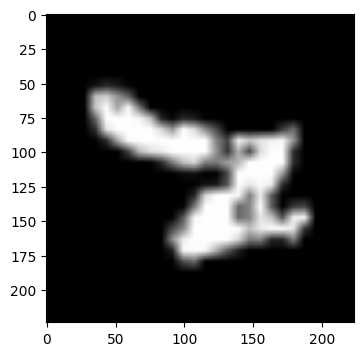

Index: 4284, Actual label: 9, Predicted label: 3


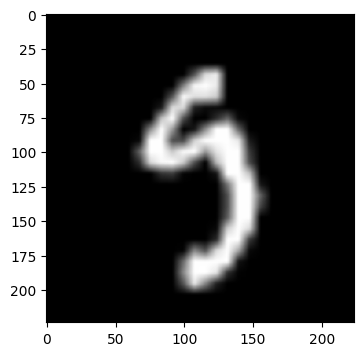

Index: 4289, Actual label: 2, Predicted label: 3


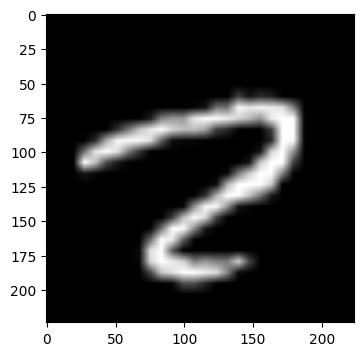

Index: 4360, Actual label: 5, Predicted label: 3


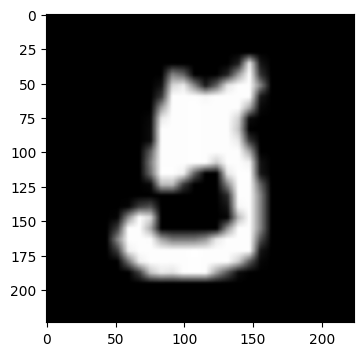

Index: 4433, Actual label: 7, Predicted label: 4


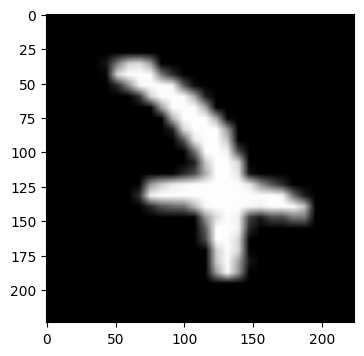

Index: 4443, Actual label: 3, Predicted label: 5


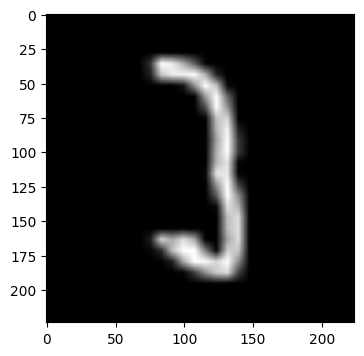

Index: 4477, Actual label: 0, Predicted label: 6


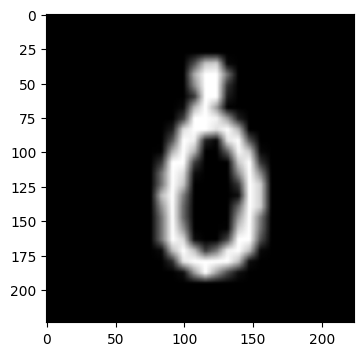

Index: 4482, Actual label: 2, Predicted label: 6


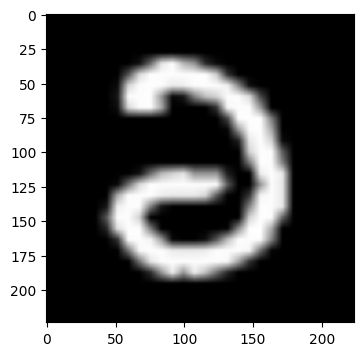

Index: 4504, Actual label: 2, Predicted label: 7


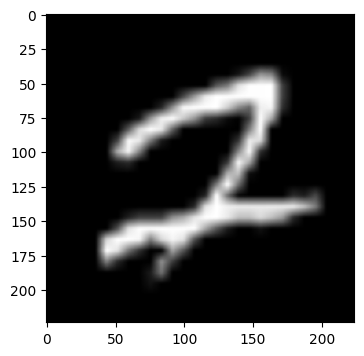

Index: 4513, Actual label: 8, Predicted label: 3


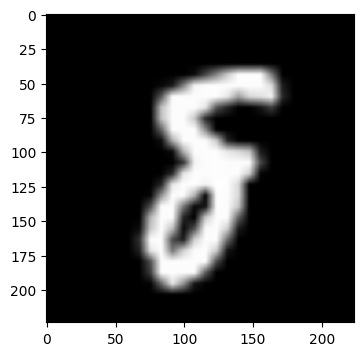

Index: 4547, Actual label: 6, Predicted label: 4


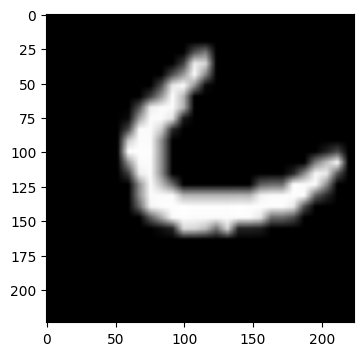

Index: 4617, Actual label: 0, Predicted label: 9


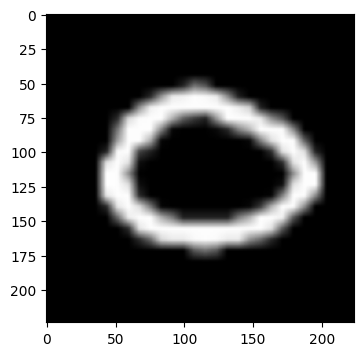

Index: 4723, Actual label: 2, Predicted label: 3


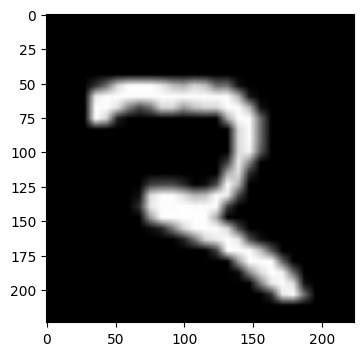

Index: 4823, Actual label: 9, Predicted label: 4


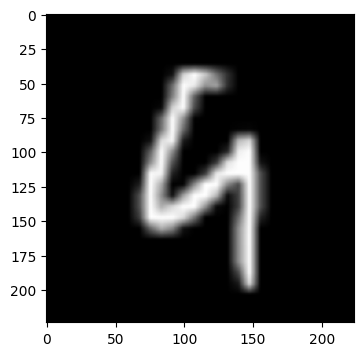

Index: 4834, Actual label: 0, Predicted label: 9


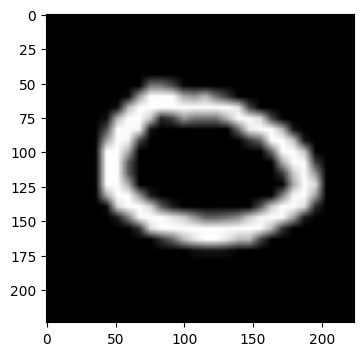

Index: 4878, Actual label: 2, Predicted label: 5


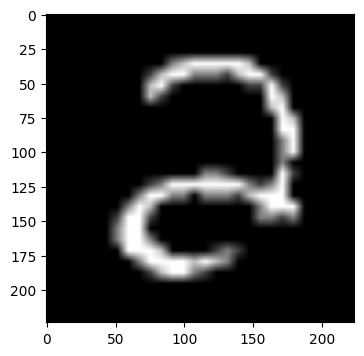

Index: 4923, Actual label: 0, Predicted label: 6


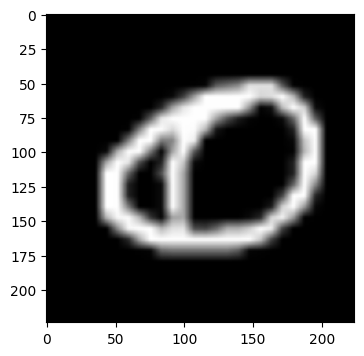

Index: 4943, Actual label: 2, Predicted label: 3


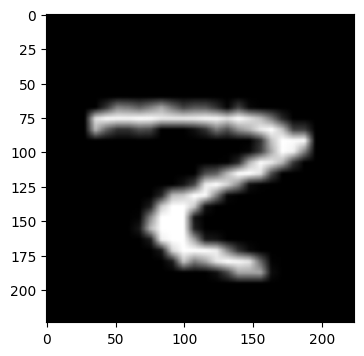

Index: 4997, Actual label: 2, Predicted label: 5


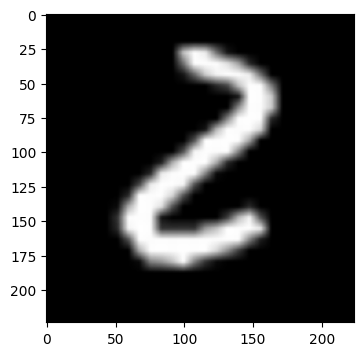

Index: 5035, Actual label: 0, Predicted label: 9


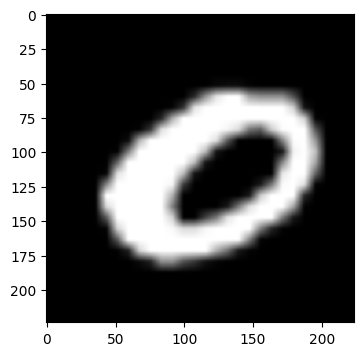

Index: 5152, Actual label: 5, Predicted label: 3


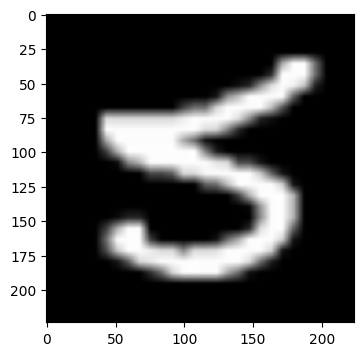

Index: 5160, Actual label: 5, Predicted label: 3


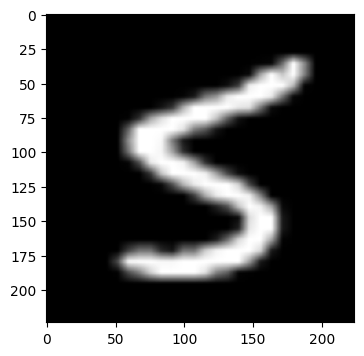

Index: 5187, Actual label: 5, Predicted label: 3


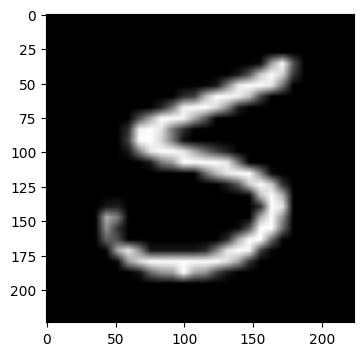

Index: 5194, Actual label: 5, Predicted label: 3


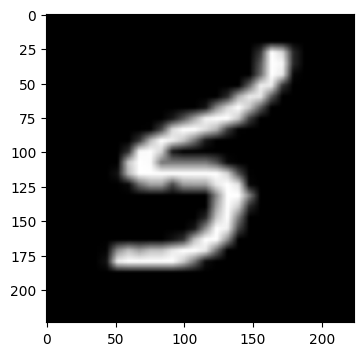

Index: 5207, Actual label: 5, Predicted label: 3


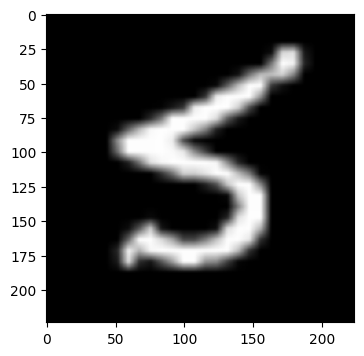

Index: 5251, Actual label: 0, Predicted label: 9


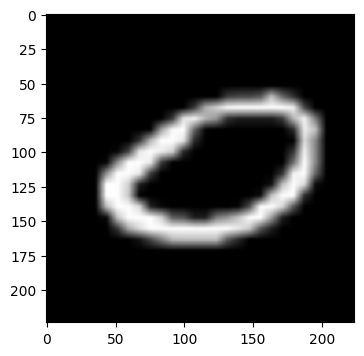

Index: 5288, Actual label: 8, Predicted label: 9


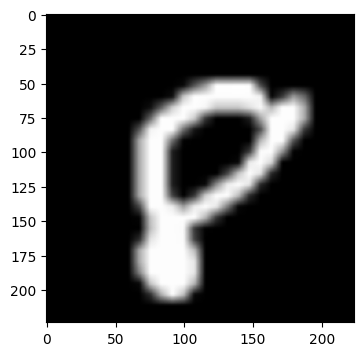

Index: 5593, Actual label: 0, Predicted label: 9


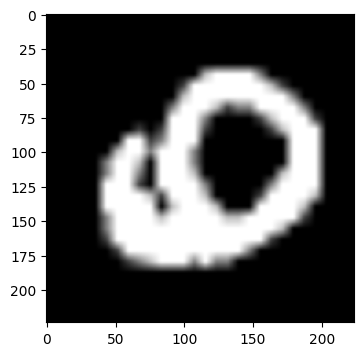

Index: 5626, Actual label: 2, Predicted label: 3


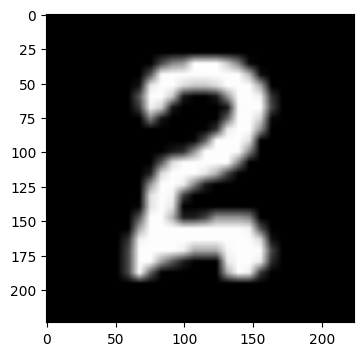

Index: 5634, Actual label: 2, Predicted label: 5


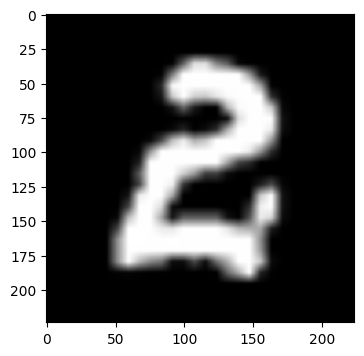

Index: 5636, Actual label: 2, Predicted label: 5


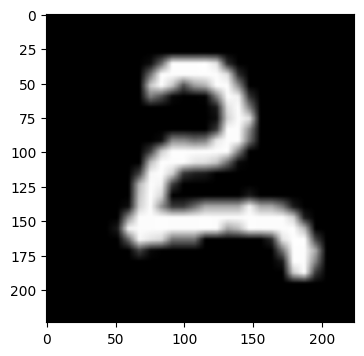

Index: 5749, Actual label: 8, Predicted label: 2


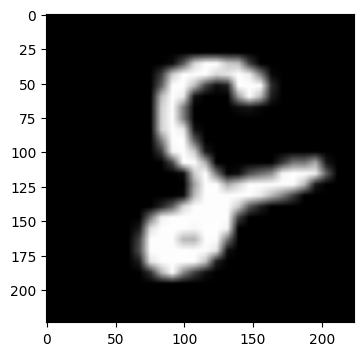

Index: 5937, Actual label: 5, Predicted label: 3


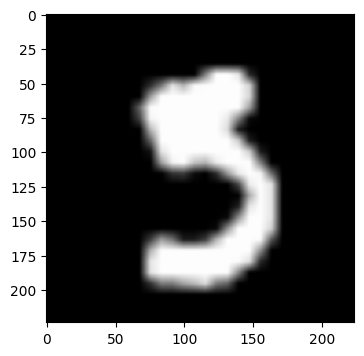

Index: 5997, Actual label: 5, Predicted label: 9


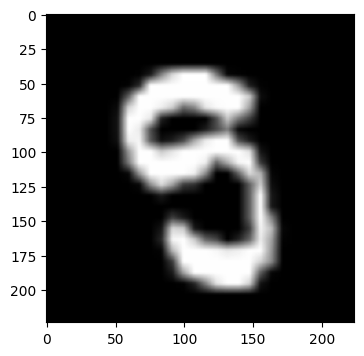

Index: 6011, Actual label: 3, Predicted label: 0


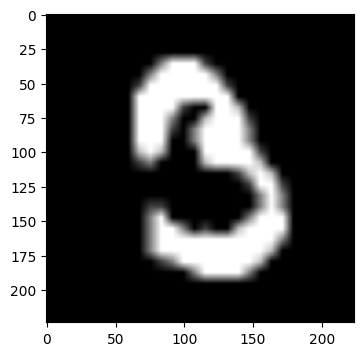

Index: 6081, Actual label: 9, Predicted label: 2


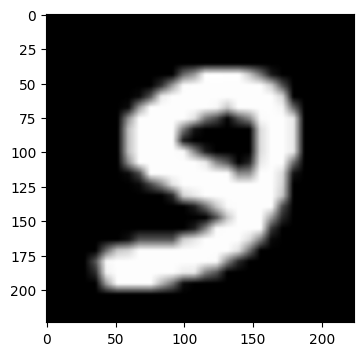

Index: 6166, Actual label: 9, Predicted label: 2


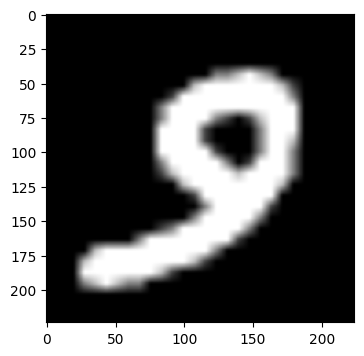

Index: 6391, Actual label: 2, Predicted label: 6


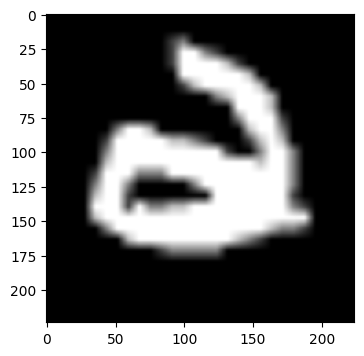

Index: 6392, Actual label: 5, Predicted label: 2


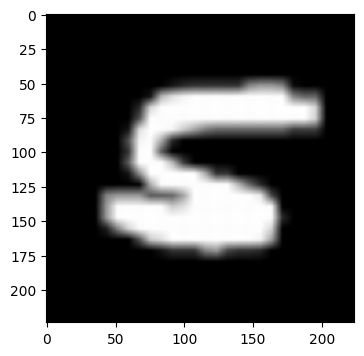

Index: 6576, Actual label: 7, Predicted label: 1


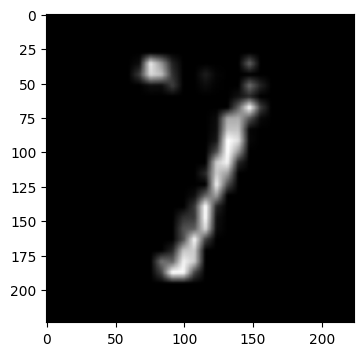

Index: 6598, Actual label: 5, Predicted label: 3


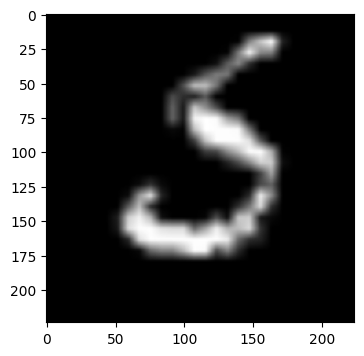

Index: 6607, Actual label: 2, Predicted label: 6


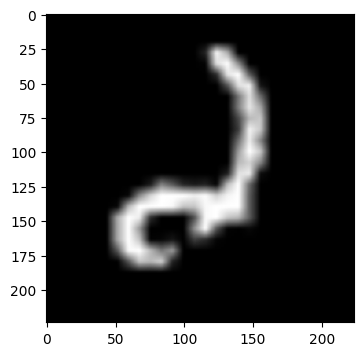

Index: 6614, Actual label: 2, Predicted label: 5


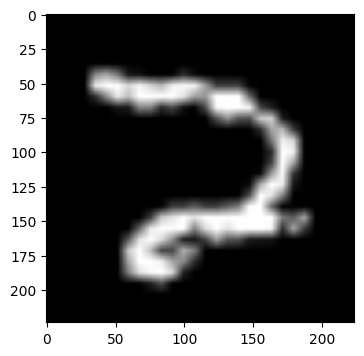

Index: 6625, Actual label: 8, Predicted label: 3


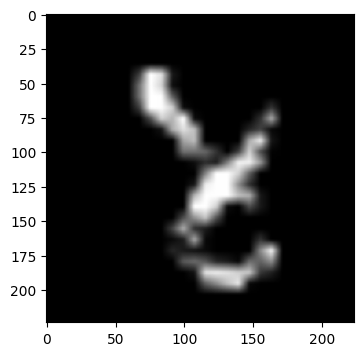

Index: 6651, Actual label: 0, Predicted label: 9


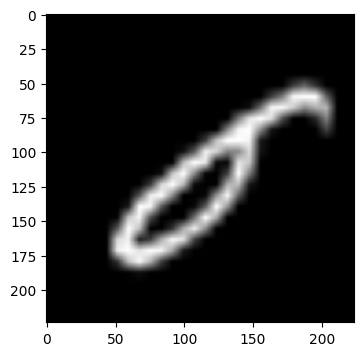

Index: 6672, Actual label: 0, Predicted label: 9


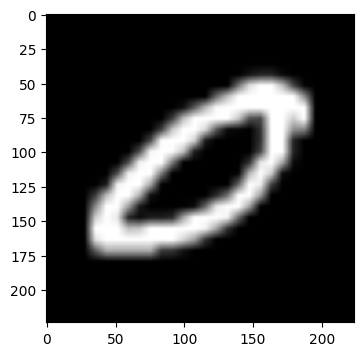

Index: 6783, Actual label: 1, Predicted label: 6


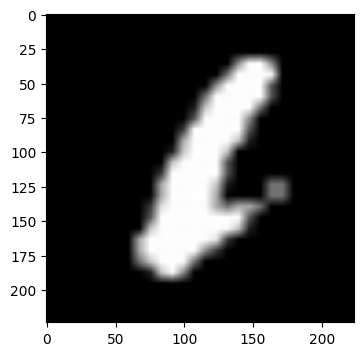

Index: 6785, Actual label: 2, Predicted label: 4


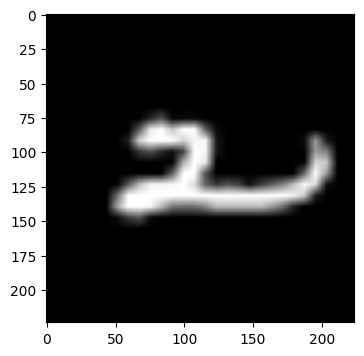

Index: 7190, Actual label: 0, Predicted label: 9


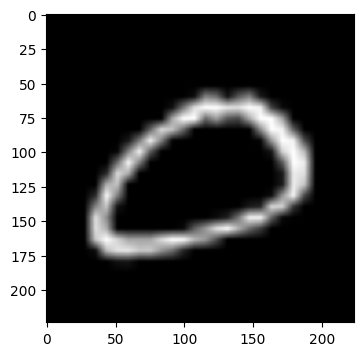

Index: 7216, Actual label: 0, Predicted label: 6


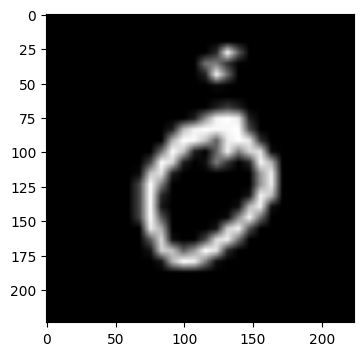

Index: 7354, Actual label: 0, Predicted label: 6


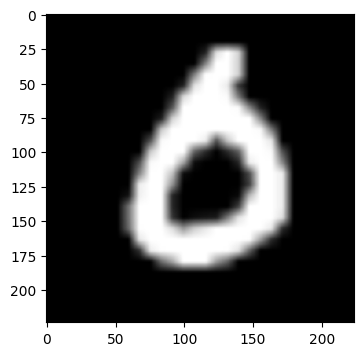

Index: 7597, Actual label: 8, Predicted label: 3


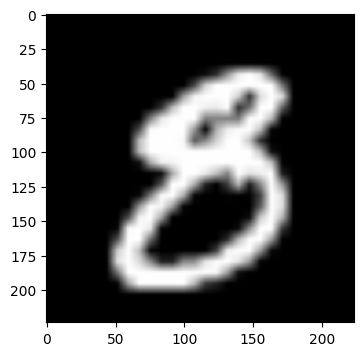

Index: 7627, Actual label: 2, Predicted label: 6


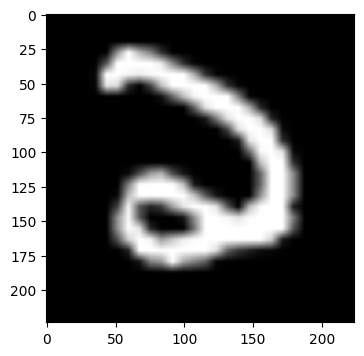

Index: 7747, Actual label: 0, Predicted label: 9


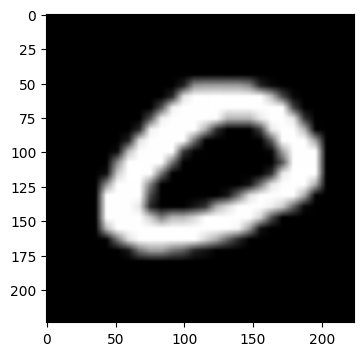

Index: 7749, Actual label: 2, Predicted label: 3


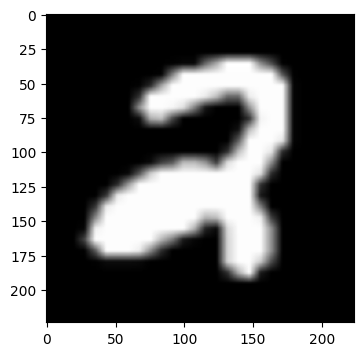

Index: 7819, Actual label: 5, Predicted label: 3


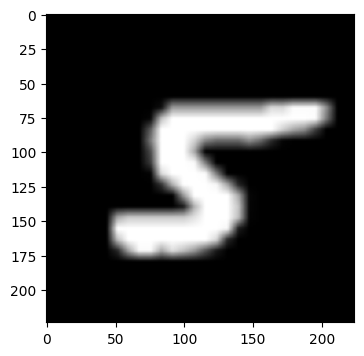

Index: 7826, Actual label: 5, Predicted label: 3


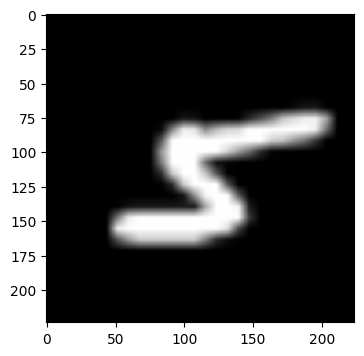

Index: 7830, Actual label: 0, Predicted label: 9


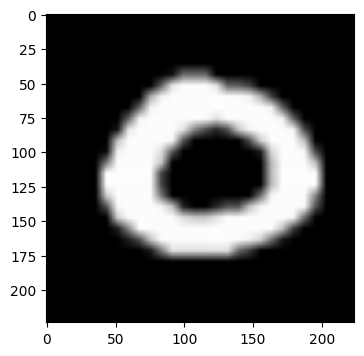

Index: 8273, Actual label: 0, Predicted label: 9


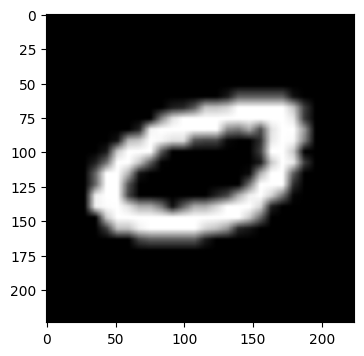

Index: 8278, Actual label: 0, Predicted label: 9


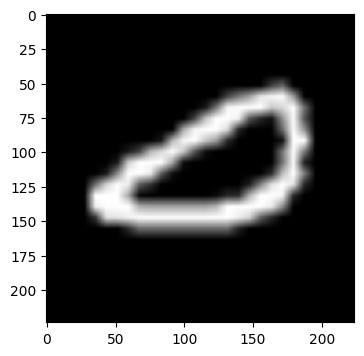

Index: 8316, Actual label: 7, Predicted label: 2


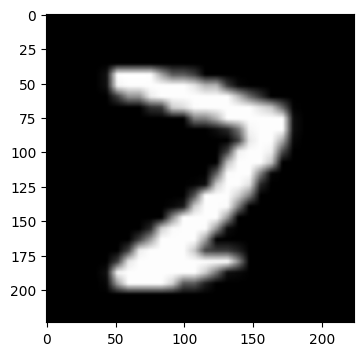

Index: 8323, Actual label: 2, Predicted label: 6


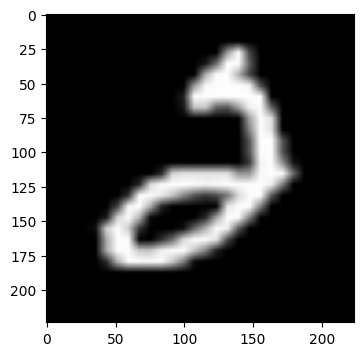

Index: 8326, Actual label: 6, Predicted label: 2


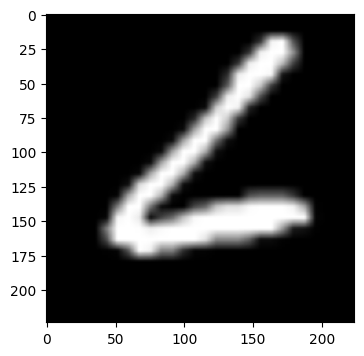

Index: 8382, Actual label: 0, Predicted label: 6


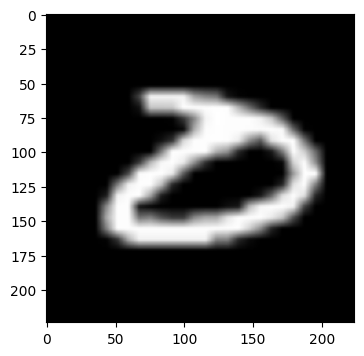

Index: 8490, Actual label: 0, Predicted label: 9


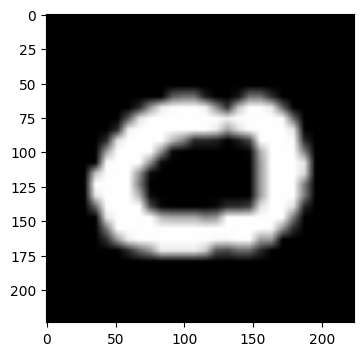

Index: 8527, Actual label: 4, Predicted label: 9


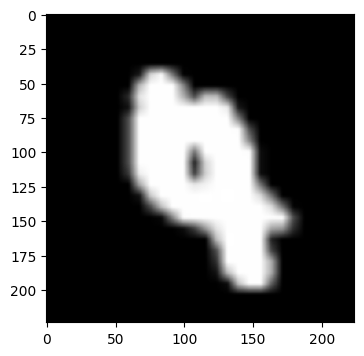

Index: 8849, Actual label: 0, Predicted label: 9


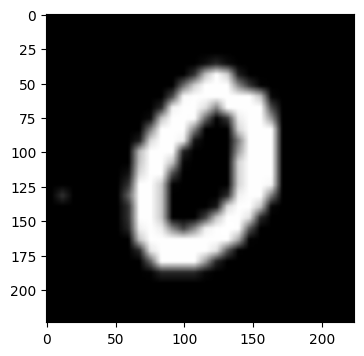

Index: 8868, Actual label: 0, Predicted label: 9


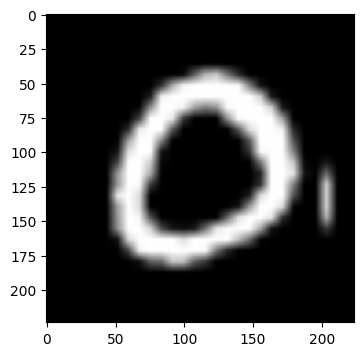

Index: 8983, Actual label: 0, Predicted label: 9


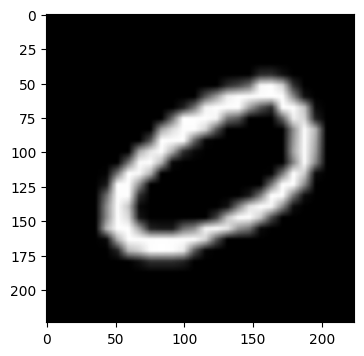

Index: 9016, Actual label: 0, Predicted label: 6


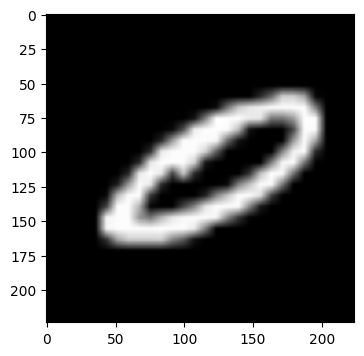

Index: 9038, Actual label: 0, Predicted label: 9


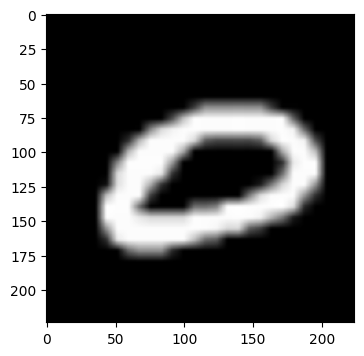

Index: 9158, Actual label: 0, Predicted label: 9


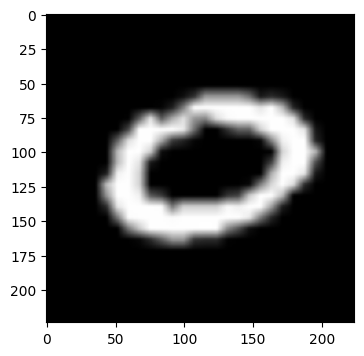

Index: 9244, Actual label: 0, Predicted label: 9


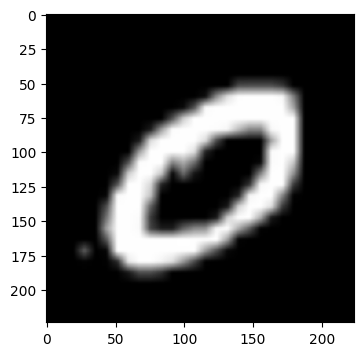

Index: 9505, Actual label: 7, Predicted label: 5


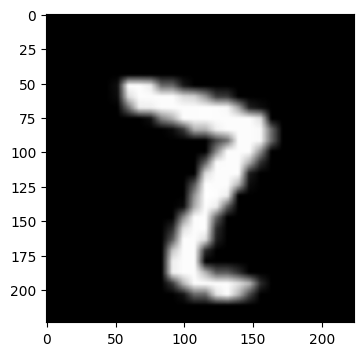

Index: 9595, Actual label: 2, Predicted label: 7


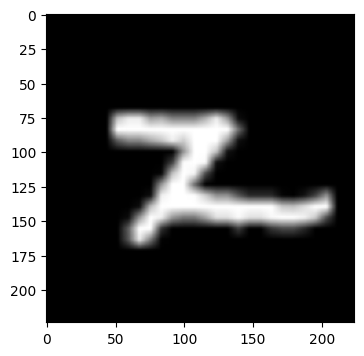

Index: 9664, Actual label: 2, Predicted label: 7


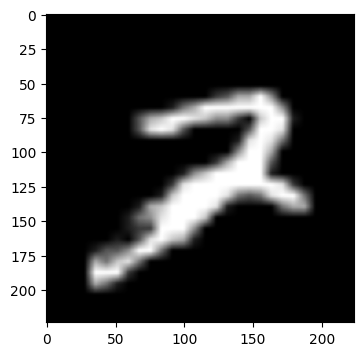

Index: 9669, Actual label: 4, Predicted label: 7


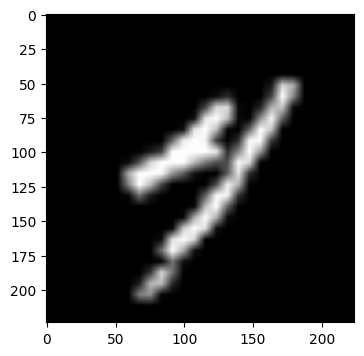

Index: 9679, Actual label: 6, Predicted label: 5


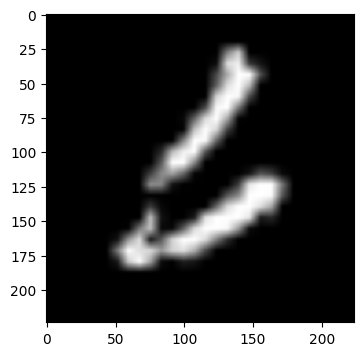

Index: 9700, Actual label: 2, Predicted label: 4


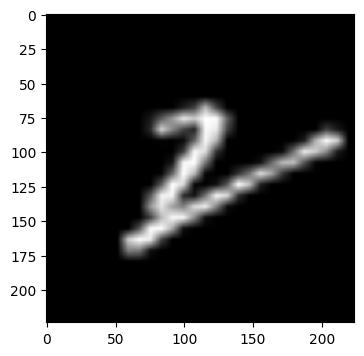

Index: 9729, Actual label: 5, Predicted label: 6


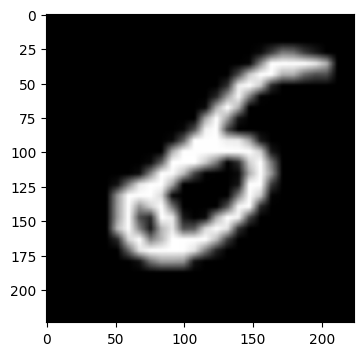

Index: 9800, Actual label: 0, Predicted label: 9


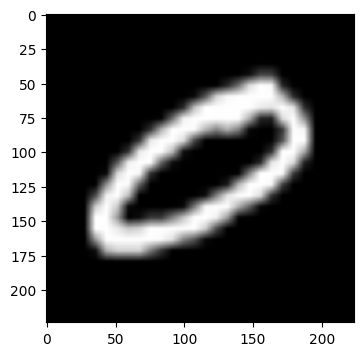

Index: 9811, Actual label: 2, Predicted label: 3


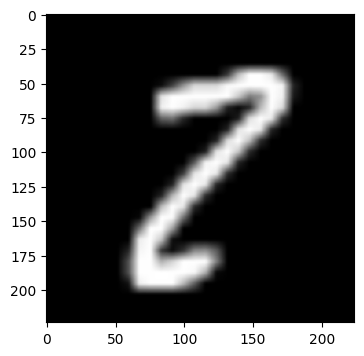

Index: 9850, Actual label: 0, Predicted label: 6


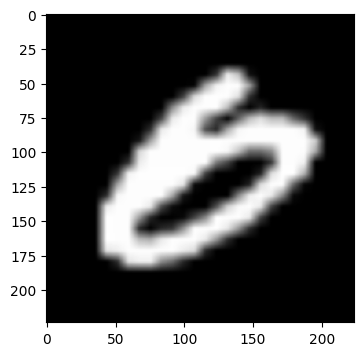

Index: 9870, Actual label: 5, Predicted label: 2


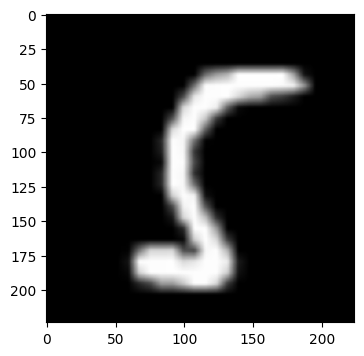

Index: 9879, Actual label: 0, Predicted label: 6


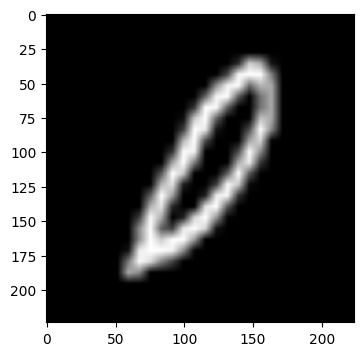

Index: 9883, Actual label: 5, Predicted label: 2


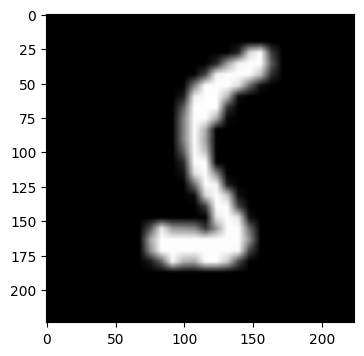

Index: 9904, Actual label: 2, Predicted label: 8


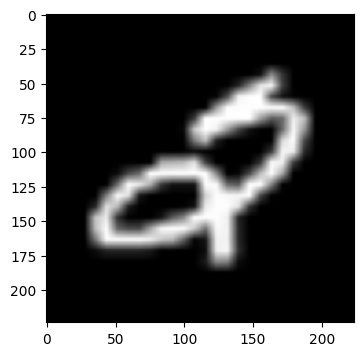

In [19]:
for index, image, actual_label, predicted_label in missed_predictions:
    print(f"Index: {index}, Actual label: {actual_label}, Predicted label: {predicted_label}")

    # Convert the 3-channel image back to a 2D grayscale image
    image_2d = image.squeeze().mean(dim=0)
    
    # Create a figure with a smaller size
    plt.figure(figsize=(4, 4))  
    
    plt.imshow(image_2d, cmap='gray')
    plt.show()


In [12]:
print(len(mnist_dataset))

10000


In [13]:
print(len(missed_predictions))

171
